# Import Data

In [3]:
import pandas as pd
import numpy as np 

In [4]:
data = pd.read_csv('Data/ARTO_BARU.csv')

In [5]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [6]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [7]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,434.237030,511.601105,434.237030,511.601105,571402,0.0,0.0,2019-11-07
1,586.469543,639.501404,384.324738,384.324738,4277101,0.0,0.0,2019-11-08
2,360.616394,370.598846,288.243561,288.243561,465616,0.0,0.0,2019-11-11
3,288.243561,288.243561,216.494614,216.494614,1443331,0.0,0.0,2019-11-12
4,205.888260,269.526428,163.462799,269.526428,6254169,0.0,0.0,2019-11-13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [9]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [10]:
data['Dividends'].value_counts()

Dividends
0.0    1213
Name: count, dtype: int64

In [11]:
data['Stock Splits'].value_counts()

Stock Splits
0.0    1213
Name: count, dtype: int64

In [12]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [13]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [14]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [15]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [16]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [17]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [18]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [19]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,215.870712,238.331253,215.246811,238.331253,212372,2019-12-04,0.097701,0.093218,230.969189,241.201208,290.084071,251.598603,297.287427,290.084071,76.217525,442.519121,137.649020,2,12
1,243.946381,293.234772,243.946381,268.278625,1047437,2019-12-05,0.125654,0.118365,237.208224,241.201208,277.917947,254.631334,294.524684,277.917947,55.639110,389.196167,166.639726,3,12
2,273.269867,298.226013,268.278625,275.765472,757328,2019-12-06,0.027907,0.027525,244.944629,243.946385,272.489983,258.473905,292.738092,272.489983,49.689284,371.868551,173.111416,4,12
3,282.004517,282.004517,269.526428,274.517670,506488,2019-12-09,-0.004525,-0.004535,254.802307,246.317220,271.803689,261.390953,291.002814,271.803689,49.554855,370.913399,172.693978,0,12
4,272.022064,272.022064,267.030823,269.526428,338994,2019-12-10,-0.018182,-0.018349,265.283890,248.750443,274.455280,262.870130,288.957444,274.455280,47.828346,370.111972,178.798587,1,12


In [20]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [21]:
dataUsed = data[['Close', 'Volume', 'ma_5', 'ma_10', 'ema_10', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'day_of_week', 'month']]

In [22]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(dataUsed)

data_scaled

array([[0.00000000e+00, 5.58485830e-04, 0.00000000e+00, ...,
        6.80208766e-03, 5.00000000e-01, 1.00000000e+00],
       [1.59619983e-03, 2.75450023e-03, 3.35449470e-04, ...,
        8.57863460e-03, 7.50000000e-01, 1.00000000e+00],
       [1.99524999e-03, 1.99158532e-03, 7.51406866e-04, ...,
        8.97521896e-03, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.33339352e-01, 1.03330871e-02, 1.37589471e-01, ...,
        1.65717114e-01, 2.50000000e-01, 9.09090909e-01],
       [1.23745322e-01, 1.85807803e-02, 1.34471029e-01, ...,
        1.61392703e-01, 5.00000000e-01, 9.09090909e-01],
       [1.24811326e-01, 5.12196924e-03, 1.31675184e-01, ...,
        1.58607762e-01, 7.50000000e-01, 9.09090909e-01]])

## Train Test Sequence

In [23]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 1:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [24]:
print(x.shape, y.shape)

(1134, 60, 10) (1134,)


## LSTM

In [25]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [27]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# train model with early stopping
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0623 - val_loss: 0.0049
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0061 - val_loss: 0.0094
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0063 - val_loss: 0.0069
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

In [29]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [30]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0] 

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [31]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


# Evaluation

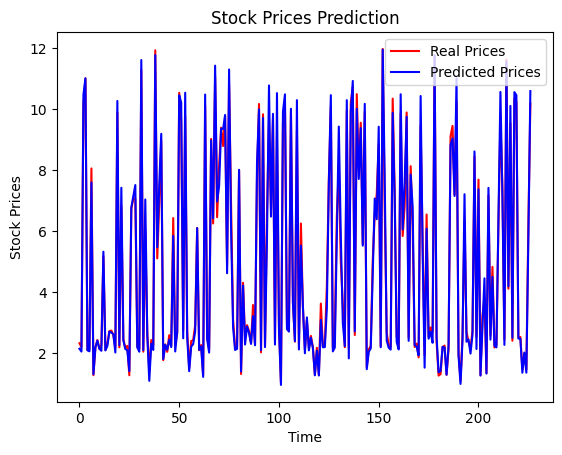

In [32]:
# conpare real and predicted prices
import matplotlib.pyplot as plt

plt.plot(real_prices, color='red', label='Real Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [33]:
print("Real Prices: ", real_prices)
print("Predicted Prices: ", predicted_prices)
print("Difference: ", real_prices - predicted_prices)

Real Prices:  [ 2.33188346  2.20876008 10.13849181 11.00328695  2.11495179  2.13420614
  8.05712045  1.28572306  2.19703404  2.43741778  2.1501299   2.28007719
  5.18424167  2.10908878  2.32015742  2.72470566  2.74815773  2.59571926
  2.18530801  9.88931355  2.19741694  6.84054423  2.46673287  2.17310503
  2.24604063  1.2832919   6.73794142  7.06040741  7.07506495  2.22172871
  2.14393093 11.28178031  2.05632161  5.99040664  2.68366453  1.40485108
  2.43741778  2.26739026 11.92671228  5.11095395  6.9284895   8.96588823
  1.77782826  2.29466431  2.0504586   2.59571926  2.25090295  6.43013298
  2.27325328  2.66021246 10.53424552  9.62547774  2.75658911  9.75739565
  2.74815773  1.51668549  2.40223967  2.43155476  2.92190961  6.10766699
  2.10322576  2.27325328  1.29544782 10.10917672  2.56054116  2.14426688
  9.02451841  6.25424244 11.06191713  6.45944807  8.13040818  9.39095703
  8.78999769  9.75739565  4.86177569 10.82739642  6.85520178  3.11166484
  2.19703404  2.24604063  7.99849027 

In [34]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

np.float64(0.3584978671861007)

In [35]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

np.float64(0.2439967913966659)

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [36]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

np.float64(0.9557522123893806)

# Save Model

In [38]:
# Save the entire model
model.save('Model/lstm_model_bankjago.h5')
